In [38]:

from datetime import datetime
from matplotlib import pyplot as plt

def get_percentage(lst):
    news_ukraine = 0
    for item in lst:
        if 'Ukraine' in item or 'ukrainian' in item or 'Russia' in item or 'russian' in item\
            or 'Putin' in item or 'Crimea' in item or 'Kyiv' in item or 'Zelensky' in item\
                or 'War' in item or 'war' in item or 'Ukrainian' in item or 'ukrainian' in item:
            news_ukraine += 1
    return round(news_ukraine / len(lst) *100, 2)


def analyze(path):
    data = {}
    with open(path, 'r') as file:
        file.readline()
        for line in file.readlines():
            line = line.strip()
            date = line.split(',')[-1]
            category = ''.join(line.split(',')[:-1])
            if date not in data:
                data[date] = []
            data[date].append(category)
    for date in data.keys():
        lst = data[date]
        data[date] = get_percentage(lst)
    return data

In [36]:
data = analyze('../news.csv')
data = {k: v for k, v in sorted(data.items(), key=lambda item: datetime.strptime(item[0], '%d.%m.%Y'))}


{'28.02.2022': 70.21,
 '09.03.2022': 72.34,
 '15.04.2022': 38.3,
 '14.07.2022': 15.56,
 '08.09.2022': 17.78,
 '11.09.2022': 24.44,
 '11.11.2022': 26.67,
 '16.01.2023': 13.64,
 '14.05.2023': 19.57}

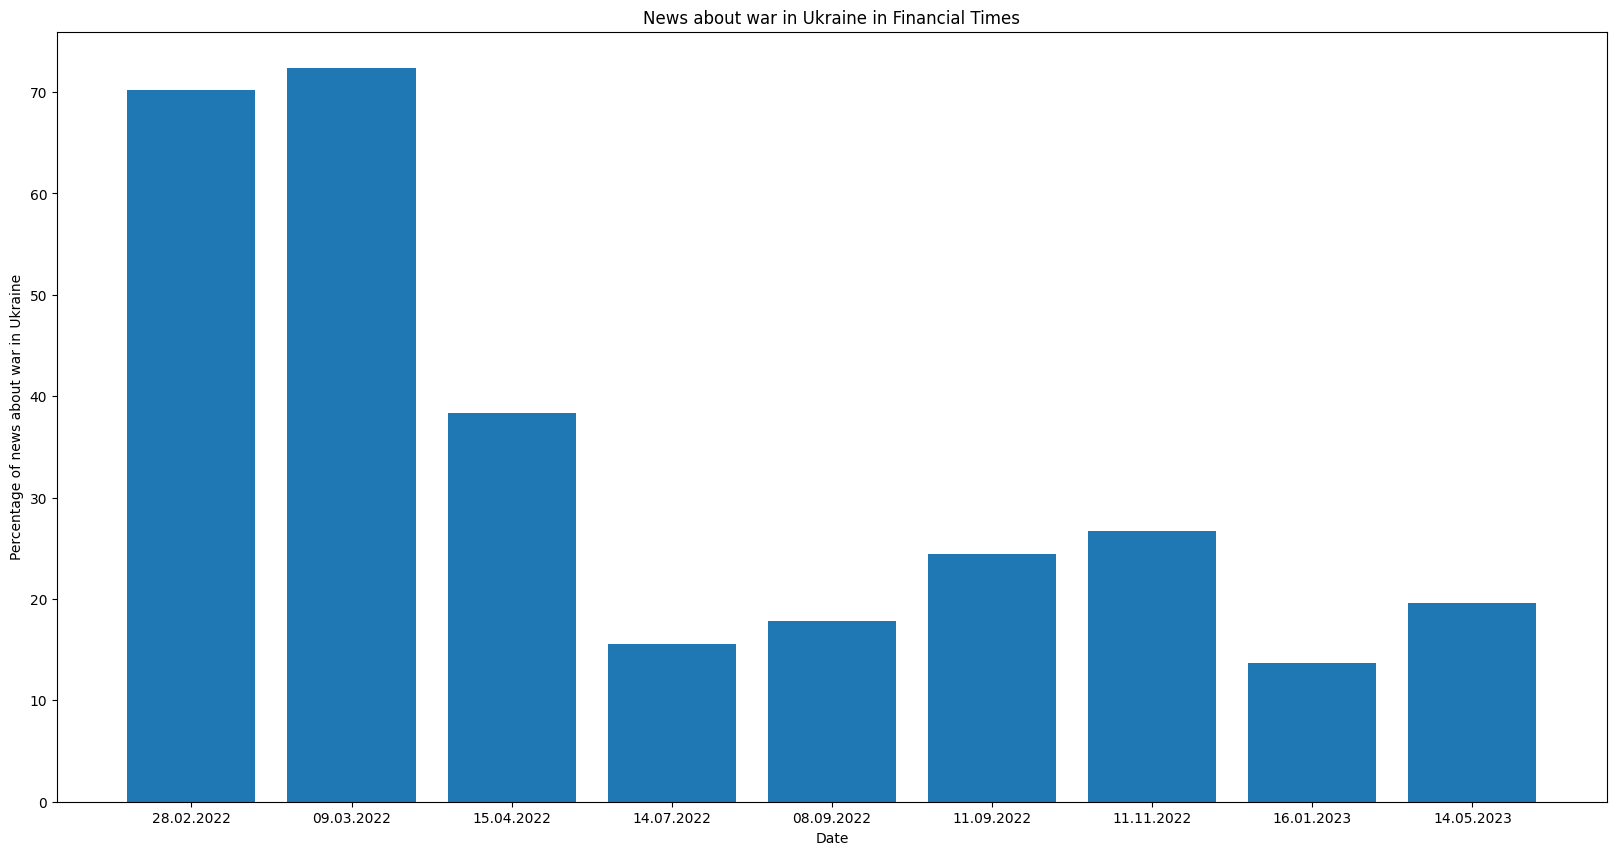

In [41]:
dates = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 10))
plt.bar(dates, values)
plt.xlabel('Date')
plt.ylabel('Percentage of news about war in Ukraine')
plt.title('News about war in Ukraine in Financial Times')
plt.show()